## Face detection

In [1]:
from ultralytics import YOLO
model = YOLO('/interns/iittcseitr24_10/face_attendance/pre_trained_models/best.pt')

In [5]:
import os

In [3]:
grp_photo_path = '/interns/iittcseitr24_10/face_attendance/WIN_20240703_14_38_58_Pro.jpg'
os.chdir('/interns/iittcseitr24_10/face_attendance/group2face')
face_detection_result = model.predict(grp_photo_path,save_crop = True, exist_ok=True,conf = 0.5)


image 1/1 /interns/iittcseitr24_10/test2/test_group.jpg: 384x640 18 faces, 690.5ms
Speed: 2.4ms preprocess, 690.5ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict


## Zoom in 

In [6]:
import cv2
import os
from PIL import Image
import shutil

In [5]:
#iterate through directory of face_segmented images
num = 0
os.chdir('/interns/iittcseitr24_10/face_attendance/group2face') # chagne current wokring directory to 'gorup2face'

#empty results directory
shutil.rmtree('/interns/iittcseitr24_10/face_attendance/group2face/zoom_in_grp_faces')
os.mkdir('/interns/iittcseitr24_10/face_attendance/group2face/zoom_in_grp_faces')

for img_path in os.listdir('/interns/iittcseitr24_10/face_attendance/group2face/runs/detect/predict/crops/face'):
    cur_img = cv2.imread(os.path.join('/interns/iittcseitr24_10/face_attendance/group2face/runs/detect/predict/crops/face',img_path))
    
    #now perform zoom-in on this image
    new_w = 256
    new_h = 256
    resized_cubic = cv2.resize(cur_img, (new_w, new_h), interpolation=cv2.INTER_CUBIC)
    resized_rgb = cv2.cvtColor(resized_cubic,cv2.COLOR_BGR2RGB)
    sav_img = Image.fromarray(resized_rgb)
    sav_img.save(f'./zoom_in_grp_faces/{num}.jpg')
    num = num + 1        
    
shutil.rmtree('/interns/iittcseitr24_10/face_attendance/group2face/runs')


## GAN aided denoising 

In [ ]:
#bash commands
python basicsr/demo.py -opt options/test/SIDD/NAFNet-width64.yml --input_path /interns/iittcseitr24_10/face_attendance/group2face/zoom_in_grp_faces/0.jpg --output_path ./demo/denoise0_img.png

#deblur
python basicsr/demo.py -opt options/test/GoPro/NAFNet-width64.yml --input_path /interns/iittcseitr24_10/face_attendance/group2face/zoom_in_grp_faces/0.jpg --output_path ./demo/deblur_img.jpg

In [7]:
os.chdir('/interns/iittcseitr24_10/face_attendance/group2face/GFPGAN')
!python inference_gfpgan.py -i /interns/iittcseitr24_10/face_attendance/group2face/zoom_in_grp_faces -o results -v 1.3 -s 2

/interns/iittcseitr24_10/test2/group2face/GFPGAN/inference_gfpgan.py:63: UserWarning: The unoptimized RealESRGAN is slow on CPU. We do not use it. If you really want to use it, please modify the corresponding codes.
  warnings.warn('The unoptimized RealESRGAN is slow on CPU. We do not use it. '
/interns/iittcseitr24_10/test2/virtual/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/interns/iittcseitr24_10/test2/virtual/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
Processing 0.jpg ...
Processing 1.jpg ...
Processing 10.jpg ...
Processing 11.jpg ...
Processing 12.jpg ...
Processing 13.jpg ...
Processin

In [10]:
#GFPGAN
# import subprocess
os.chdir('/interns/iittcseitr24_10/face_attendance/group2face/GFPGAN')
# gan = 'python inference_gfpgan.py -i /interns/iittcseitr24_10/face_attendance/group2face/zoom_in_grp_faces -o results -v 1.3 -s 2'
os.system("python inference_gfpgan.py -i /interns/iittcseitr24_10/face_attendance/group2face/zoom_in_grp_faces -o results -v 1.3 -s 2")
# result = subprocess.run([gan], capture_output=True, text=True)

# print("Output:", result.stdout)
# print("Error:", result.stderr)
# print("Return code:", result.returncode)

/interns/iittcseitr24_10/test2/group2face/GFPGAN/inference_gfpgan.py:63: UserWarning: The unoptimized RealESRGAN is slow on CPU. We do not use it. If you really want to use it, please modify the corresponding codes.
  warnings.warn('The unoptimized RealESRGAN is slow on CPU. We do not use it. '
Traceback (most recent call last):
  File "/interns/iittcseitr24_10/test2/group2face/GFPGAN/inference_gfpgan.py", line 174, in <module>
    main()
  File "/interns/iittcseitr24_10/test2/group2face/GFPGAN/inference_gfpgan.py", line 118, in main
    restorer = GFPGANer(
  File "/interns/iittcseitr24_10/test2/group2face/GFPGAN/gfpgan/utils.py", line 40, in __init__
    self.gfpgan = GFPGANv1Clean(
  File "/interns/iittcseitr24_10/test2/group2face/GFPGAN/gfpgan/archs/gfpganv1_clean_arch.py", line 226, in __init__
    self.conv_body_up.append(ResBlock(in_channels, out_channels, mode='up'))
  File "/interns/iittcseitr24_10/test2/group2face/GFPGAN/gfpgan/archs/gfpganv1_clean_arch.py", line 133, in __in

2

## Head Segmentation

In [1]:
import torch
import head_segmentation.segmentation_pipeline as seg_pipeline
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
segmentation_pipeline = seg_pipeline.HumanHeadSegmentationPipeline(device=device)
import numpy as np

In [13]:
import matplotlib.pyplot as plt

In [11]:

num = 0
for image_path in os.listdir('/interns/iittcseitr24_10/face_attendance/group2face/GFPGAN/results/restored_imgs'):
    #apply head segmentaiton here now
    cur_img = cv2.imread(os.path.join('/interns/iittcseitr24_10/face_attendance/group2face/GFPGAN/results/restored_imgs',image_path))
    segmentation_map = segmentation_pipeline.predict(cur_img)
    
    _, binary_mask = cv2.threshold(segmentation_map, 0.5, 1, cv2.THRESH_BINARY)

    # Find contours in the binary mask
    contours, _ = cv2.findContours(binary_mask.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Get the largest contour for the head region
    if contours:
        largest_contour = max(contours, key=cv2.contourArea)

        # Get the tighter bounding box around the head
        x, y, w, h = cv2.boundingRect(largest_contour)

        # Draw the bounding box on the segmented region
        cv2.rectangle(cur_img, (x, y), (x + w, y + h), (0, 255, 0), 2)

    segmented_region = cur_img * cv2.cvtColor(segmentation_map, cv2.COLOR_GRAY2RGB)
    segmented_region_rgb = cv2.cvtColor(segmented_region, cv2.COLOR_BGR2RGB)
    pil_image = Image.fromarray(segmented_region_rgb)
    pil_image.save(f'/interns/iittcseitr24_10/face_attendance/group2face/segmented_heads/{num}.jpg')

    num = num + 1

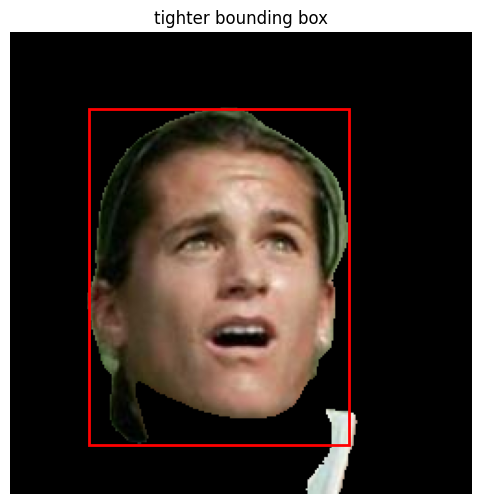

In [18]:
cur_img = cv2.imread('/interns/iittcseitr24_10/face_attendance/lfw-deepfunneled/Amelie_Mauresmo/Amelie_Mauresmo_0002.jpg')
segmentation_map = segmentation_pipeline.predict(cur_img)

_, binary_mask = cv2.threshold(segmentation_map, 0.5, 1, cv2.THRESH_BINARY)

# Find contours in the binary mask
contours, _ = cv2.findContours(binary_mask.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Get the largest contour for the head region
if contours:
    largest_contour = max(contours, key=cv2.contourArea)

    # Get the tighter bounding box around the head
    x, y, w, h = cv2.boundingRect(largest_contour)


segmented_region = cur_img * cv2.cvtColor(segmentation_map, cv2.COLOR_GRAY2RGB)
segmented_region_rgb = cv2.cvtColor(segmented_region, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(8, 6))
plt.imshow(segmented_region_rgb)

# Draw the bounding box using matplotlib's Rectangle function
ax = plt.gca()
rect = plt.Rectangle((x, y), w, h, linewidth=2, edgecolor='red', facecolor='none')
ax.add_patch(rect)

plt.title('tighter bounding box')
plt.axis('off')  # Hide axis ticks
plt.show()


In [10]:
#dataset names renaming

dir_path = '/interns/iittcseitr24_10/face_attendance/api-calls/demo_dataset'
# os.chdir('/interns/iittcseitr24_10/face_attendance/group2face')
for name in os.listdir(dir_path):
    i = 0
    for image_path in os.listdir(f'{dir_path}/{name}'):
        full_img_path = f'{dir_path}/{name}/{image_path}'
        os.rename(full_img_path, f'/interns/iittcseitr24_10/face_attendance/api-calls/demo_dataset/{name}/{name}_{i}.jpg')
        i += 1
        

In [ ]:
dir_path = '/interns/iittcseitr24_10/face_attendance/api-calls/demo_dataset'
# os.chdir('/interns/iittcseitr24_10/face_attendance/group2face')
for name in os.listdir(dir_path):
    i = 0
    for image_path in os.listdir(f'{dir_path}/{name}'):
        full_img_path = f'{dir_path}/{name}/{image_path}'
        face_detection_result = model.predict(full_img_path,save_crop = True, exist_ok=True,conf = 0.5, project=f'{dir_path}/{name}')
        #delete original
        os.remove(f'/interns/iittcseitr24_10/face_attendance/api-calls/demo_dataset/{name}/{image_path}')
        i+=1


In [14]:
#proper arranigng of dataset
import shutil

dir_path = '/interns/iittcseitr24_10/face_attendance/api-calls/demo_dataset'
for name in os.listdir(dir_path):
    cur_path = f'{dir_path}/{name}/pranav_i.jpg/crops/face'
    for image in os.listdir(cur_path):
        #put this img in main directory
        shutil.move(os.path.join(cur_path,image), f'{dir_path}/{name}')


In [19]:
import os
import cv2
from PIL import Image

dir = '/interns/iittcseitr24_10/face_attendance/api-calls/demo_dataset'
for name in os.listdir(dir):
    num = 0
    for image_path in os.listdir(f'{dir}/{name}'):
        #apply head segmentaiton here now
        cur_img = cv2.imread(f'{dir}/{name}/{image_path}')
        segmentation_map = segmentation_pipeline.predict(cur_img)

        segmented_region = cur_img * cv2.cvtColor(segmentation_map, cv2.COLOR_GRAY2RGB)
        segmented_region_rgb = cv2.cvtColor(segmented_region, cv2.COLOR_BGR2RGB)
        pil_image = Image.fromarray(segmented_region_rgb)
        pil_image.save(f'{dir}/{name}/{image_path}')

        num = num + 1

In [12]:
shutil.rmtree('/interns/iittcseitr24_10/face_attendance/group2face/GFPGAN/results')